In [7]:
import matplotlib.pyplot as plt
#%pip install --upgrade sultan
from sultan.api import Sultan
import kappa

In [8]:
def parse_result(r):
    res = [int(x) for x in r.stdout]
    timet = r.stderr[8].split('\t')[1].split('m')
    time_s = int(timet[0])*60 + float('.'.join(timet[1][:-1].split(',')))

    return res, time_s

In [9]:
s = Sultan()

In [10]:
testo_dirs = {'test_single':kappa.small_files, 'test_multiple':kappa.large_files}
filez = ['Recursion_tree', 'Heuristic_recursive', 'Segment', 'Persistent_segment', 'Solution_psi', 'Static_dp', 'Dynamic']
create_system=True

In [17]:
if create_system:
    # system = {}
    for directory in testo_dirs:
        # system[directory] = {}
        for file in filez:
            if file in system[directory]:
                continue
                
            print(f'Now processed: file {file} on directory {directory}')
            system[directory][file] = []
            for i in range(testo_dirs[directory]):
                r = s.bash(f'falka.sh {file}.cpp {directory}/test_{i}.txt').run()
                system[directory][file].append(parse_result(r))
else:
    from theta import system

Now processed: file Static_dp on directory test_single


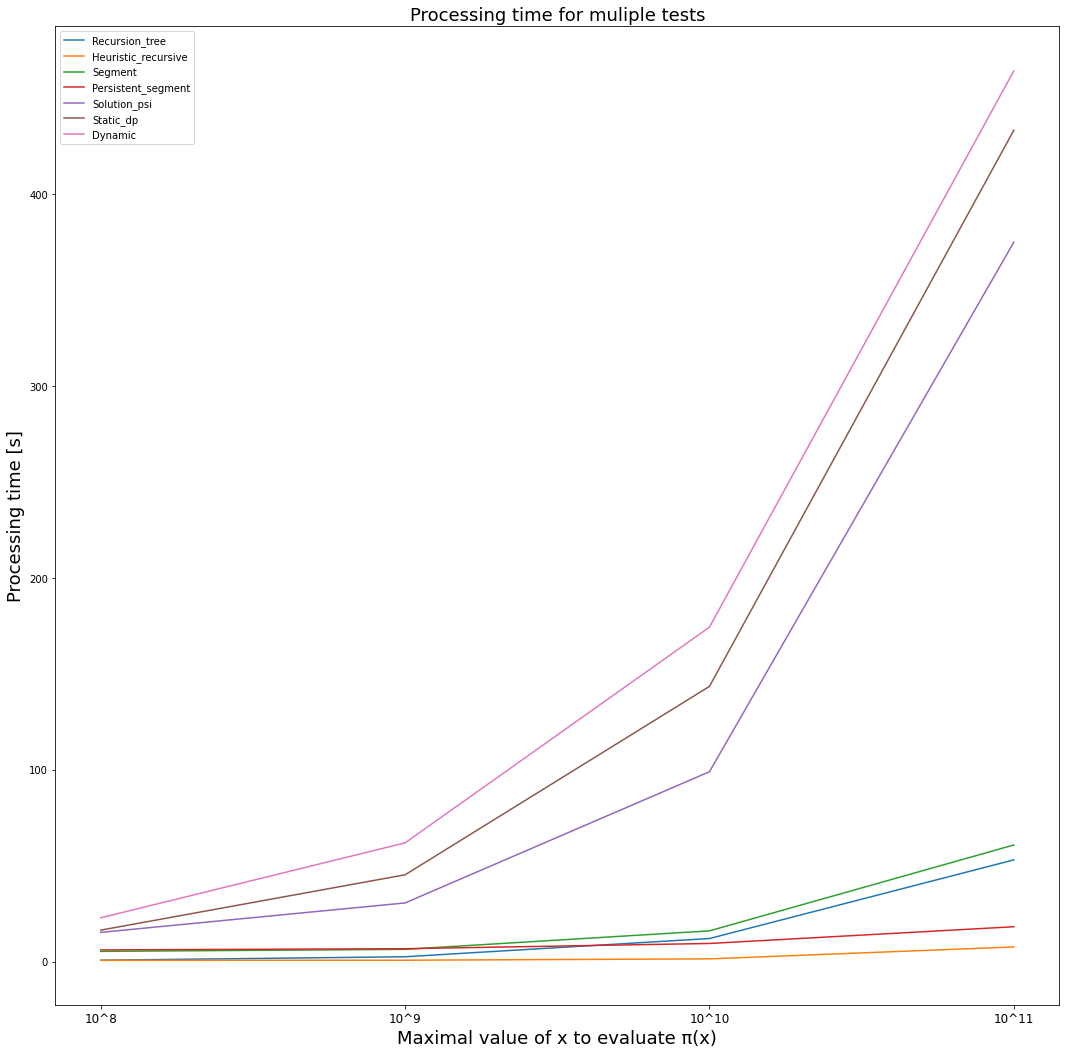

In [22]:
def plot_huge(ax, proto_system, filename):
    ax.plot([x[1] for x in proto_system][::-1], label=filename)
    

fig, ax = plt.subplots(1, 1, figsize=(18,18))
for file in filez:
    plot_huge(ax, system['test_multiple'][file], file)
    
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([f'10^{i}' for i in range(8, 12)], fontsize=12)
ax.set_xlabel('Maximal value of x to evaluate π(x)', fontsize=18)
ax.set_ylabel('Processing time [s]', fontsize=18)
ax.set_title('Processing time for muliple tests', fontsize=18)
ax.legend()
plt.savefig('alpha.svg', bbox_inches='tight')

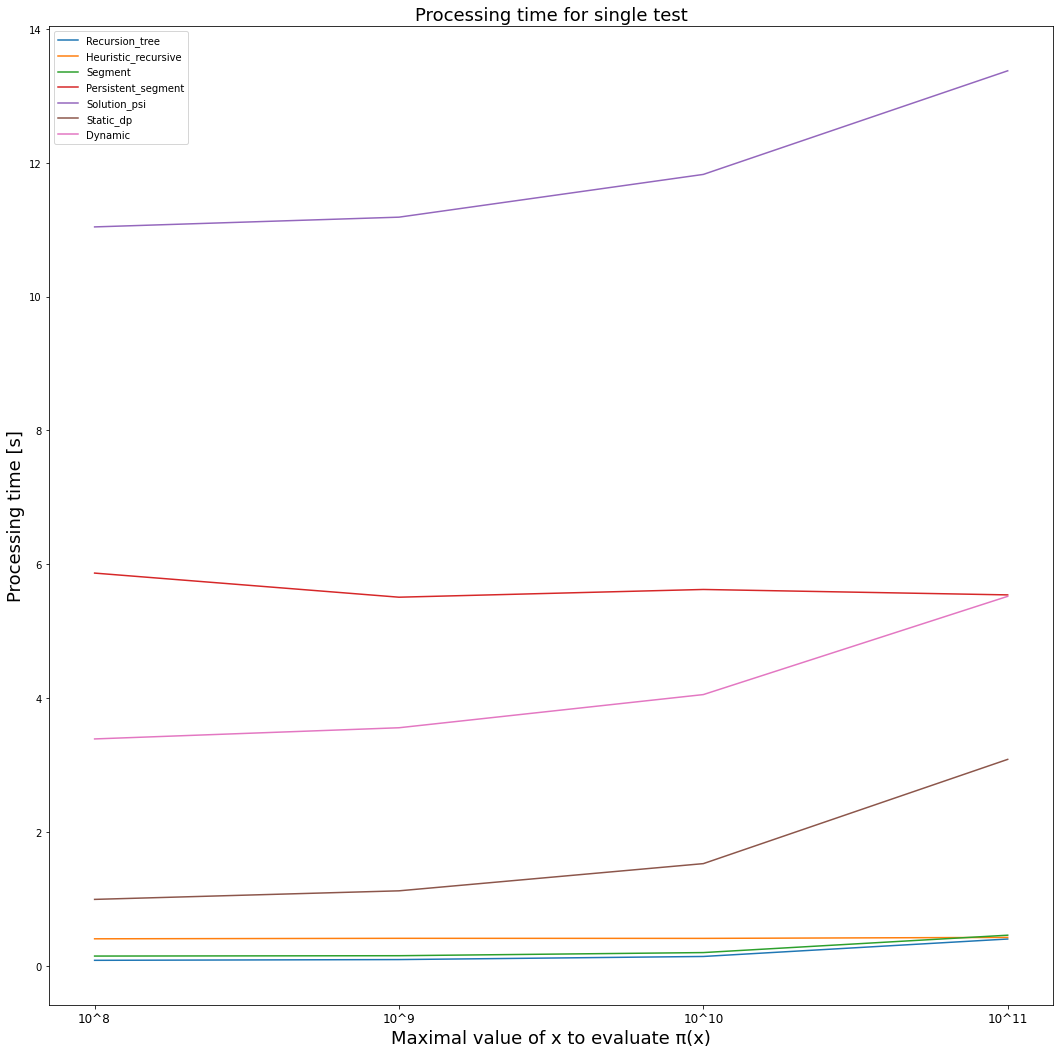

In [23]:
def plot_small(ax, proto_system, filename):
    basis = [x[1] for x in proto_system]
    summa = [basis[i*50:(i+1)*50] for i in range(4)]
    post_summa = [sum(x)/len(x) for x in summa]
    ax.plot(post_summa[::-1], label=filename)
    
fig, ax = plt.subplots(1, 1, figsize=(18,18))
for file in filez:
    plot_small(ax, system['test_single'][file], file)
    
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([f'10^{i}' for i in range(8, 12)], fontsize=12)
ax.set_xlabel('Maximal value of x to evaluate π(x)', fontsize=18)
ax.set_ylabel('Processing time [s]', fontsize=18)
ax.set_title('Processing time for single test', fontsize=18)
ax.legend()
plt.savefig('beta.svg', bbox_inches='tight')

In [56]:
#Testy poprawności
results = {}
proper_results = {}

for directory in testo_dirs:
    results[directory] = []
    proper_results[directory] = []
    for y in system[directory]:
        results[directory].append([_[0] for _ in system[directory][y]])
        
    #Spłaszczanie rezultatów
    for z in results[directory]:
        proper_results[directory].append([])
        for y in z:
            proper_results[directory][-1].extend(y)
    
    #Sprawdzanie tożsamości
    neo_result = list(zip(*proper_results[directory]))
    for x in neo_result:
        if max(x) != min(x):
            print(f'BLAGA: {x}')

In [57]:
#Zapis rezultatów
with open('omikron.py', 'w+') as theta:
    theta.write(f'system = {system}\n')